In [2]:
import sys
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
!{sys.executable} -m pip install fredapi > NUL 2>&1

In [4]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='../.env')
api_key = os.getenv("FRED_API_KEY")

In [5]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [6]:
from fredapi import Fred
fred = Fred(api_key=api_key)

In [7]:
sp_search = fred.search('S&P', order_by='popularity')

In [8]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-07-04,2025-07-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-07-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 09:00:03-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-07-04,2025-07-04,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-06-24 08:12:56-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-07-04,2025-07-04,S&P 500,2015-07-06,2025-07-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-03 19:04:07-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-07-04,2025-07-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-07-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 09:00:03-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-07-04,2025-07-04,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-07-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 09:10:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


<Axes: title={'center': 'S&P 500'}>

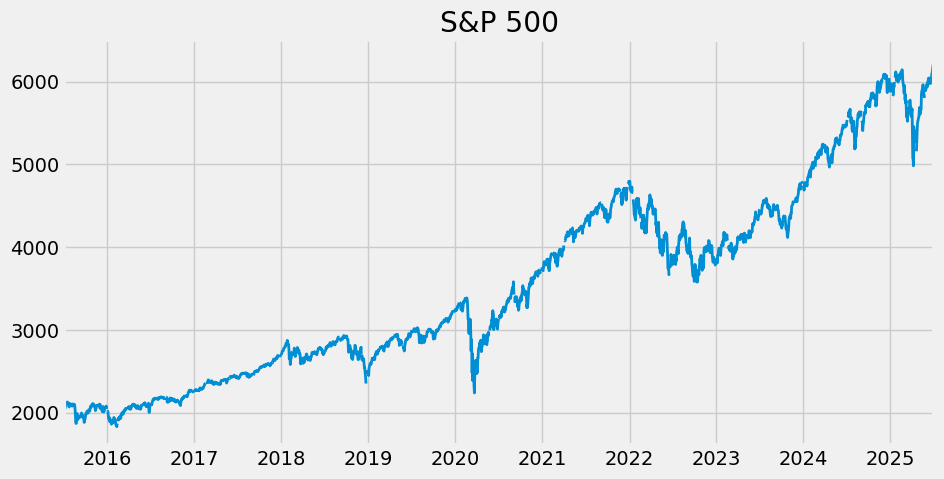

In [9]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw=2)

In [10]:
unemp_results = fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-04,2025-07-04,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-07-04,2025-07-04,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 07:47:54-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-07-04,2025-07-04,Unemployment Level,1948-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-07-03 07:48:40-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-07-04,2025-07-04,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-07-04,2025-07-04,Continued Claims (Insured Unemployment),1967-01-07,2025-06-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-07-03 07:33:02-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC317430010,ENUC317430010,2025-07-04,2025-07-04,"Total Quarterly Wages in Manhattan, KS (MSA)",2013-01-01,2024-10-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2025-06-04 11:20:23-05:00,1,Total wages are the wages paid by Unemployment...
IPUEN3116L020000000,IPUEN3116L020000000,2025-07-04,2025-07-04,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2025-04-24 15:24:03-05:00,1,"Labor compensation, defined as payroll plus su..."
IPUEN3116U110000000,IPUEN3116U110000000,2025-07-04,2025-07-04,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2025-04-24 15:24:02-05:00,1,"Labor compensation, defined as payroll plus su..."


<Axes: >

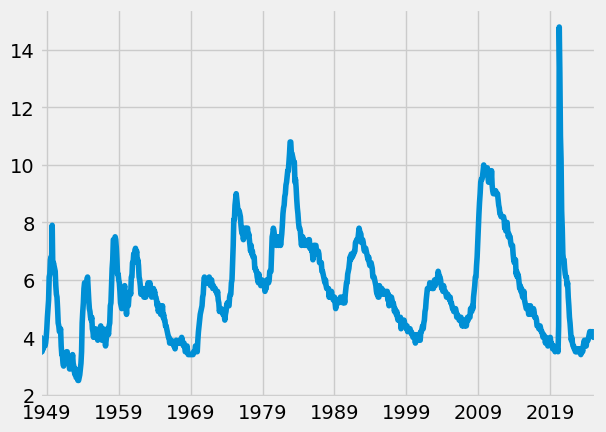

In [11]:
unrate = fred.get_series(series_id='UNRATE')
unrate.plot()

In [ ]:
unem_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unem_df = unem_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unem_df = unem_df.loc[unem_df['title'].str.contains('Unemployment Rate')]
unem_df


In [23]:
all_results = []

for myid in unem_df.index:
    results = fred.get_series(myid)
    results.to_frame(name=myid)
    all_results.append(results)


In [27]:
pd.concat(all_results, axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,4.1,6.0,5.4,4.1,NaN,3.8,5.5,NaN,4.3,1.9,3.6,4.1,5.2,3.8,3.8,4.7,4.2,4.2,5.4,2.5,3.3,9.7,4.3,3.7,4.8,4.6,3.6,4.7,3.9,3.2,3.1,5.3,4.205562,4.2,4.4,3.0,3.7,3.2,12.9,4.4,6.0,3.0,4.5,3.9,5.8,3.6
2025-03-01,4.2,6.2,5.3,4.1,NaN,3.8,6.1,NaN,4.2,1.9,3.6,4.1,5.1,3.7,3.8,4.8,4.2,4.1,5.5,2.6,3.3,9.4,4.4,3.7,4.8,4.7,3.6,4.8,4.1,3.2,3.2,5.2,4.260365,4.1,4.3,3.1,3.6,3.5,13.7,4.4,5.8,3.0,4.6,3.8,5.7,3.7
2025-04-01,4.2,6.3,5.3,4.1,NaN,3.8,5.6,NaN,4.2,2.0,3.7,4.0,5.2,3.8,3.9,4.9,4.4,4.0,5.5,2.5,3.3,9.6,4.6,3.7,4.8,4.8,3.6,4.8,4.1,3.3,3.3,5.2,4.299359,4.2,4.3,3.2,3.5,3.0,13.0,4.4,6.1,3.1,4.7,3.8,5.6,3.7
2025-05-01,4.2,6.0,5.3,4.1,NaN,3.9,5.2,NaN,4.0,2.0,3.7,4.2,5.1,3.8,3.9,4.9,4.3,4.5,5.4,2.6,3.3,9.7,4.8,3.7,4.8,4.8,3.5,4.8,4.1,3.3,3.4,5.0,4.321766,4.1,4.2,3.3,3.5,3.6,13.4,4.5,5.5,3.2,4.8,3.8,5.5,3.7


In [30]:
px.line(unem_df)

ValueError: Plotly Express cannot process wide-form data with columns of different type.